In [3]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('spammail.csv')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data_array = df.values

In [7]:
print(data_array[:5])

[['ham'
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']
 ['ham' 'Ok lar... Joking wif u oni...']
 ['spam'
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
 ['ham' 'U dun say so early hor... U c already then say...']
 ['ham' "Nah I don't think he goes to usf, he lives around here though"]]


In [8]:
#countnullvalues
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [9]:
#remove null
df.dropna(inplace=True)
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [10]:
#drop duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [11]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [12]:
# Apply preprocessing function
df['Message'] = df['Message'].apply(preprocess_text)
# Convert 'Category' to binary (1 for spam, 0 for ham)
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

In [13]:
categories = df['Category'].to_numpy()
messages = df['Message'].to_numpy()

In [14]:
# Count the number of spam and ham messages
num_spam = np.sum(categories)
num_ham = len(categories) - num_spam

In [15]:
print(f'Number of spam messages: {num_spam}')
print(f'Number of ham messages: {num_ham}')

Number of spam messages: 641
Number of ham messages: 4516


In [16]:
# Calculate the length of each message
message_lengths = np.array([len(message) for message in messages])

# Calculate statistics on message lengths
mean_length = np.mean(message_lengths)
max_length = np.max(message_lengths)
min_length = np.min(message_lengths)

In [17]:
print(f'Mean message length: {mean_length}')
print(f'Max message length: {max_length}')
print(f'Min message length: {min_length}')

Mean message length: 52.947062245491566
Max message length: 516
Min message length: 0


In [18]:
normalized_lengths = (message_lengths - np.mean(message_lengths)) / np.std(message_lengths)

print('First 10 normalized message lengths:', normalized_lengths[:10])

First 10 normalized message lengths: [ 0.7071964  -0.72896087  1.99730378 -0.43686108 -0.24212789  0.85324629
 -0.16910295  1.46178751  1.6565207   1.36442091]


C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


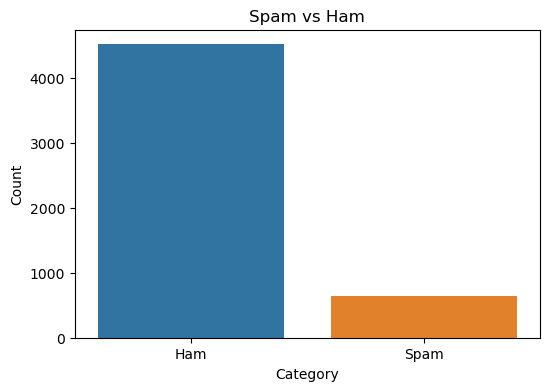

In [19]:
#barplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Category')
plt.title('Spam vs Ham')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

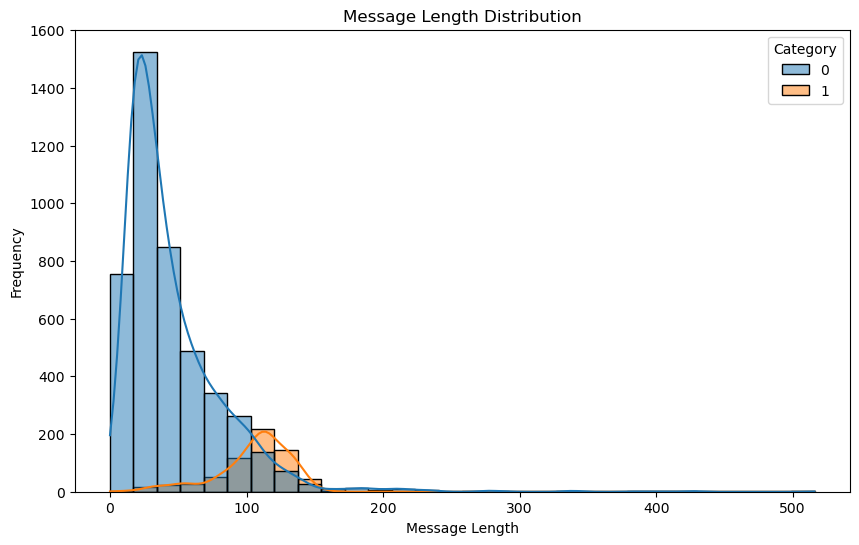

In [20]:
# Calculate message lengths
df['Message_Length'] = df['Message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df, x='Message_Length', hue='Category', bins=30, kde=True)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


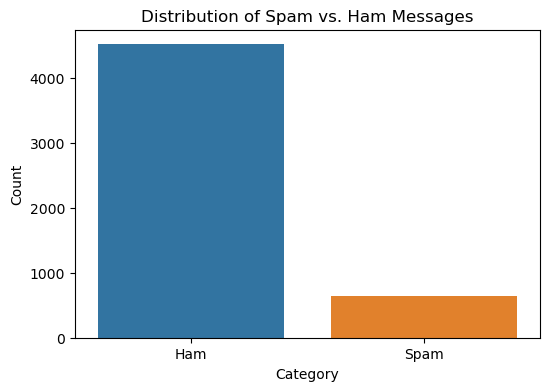

In [21]:
#count plot

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

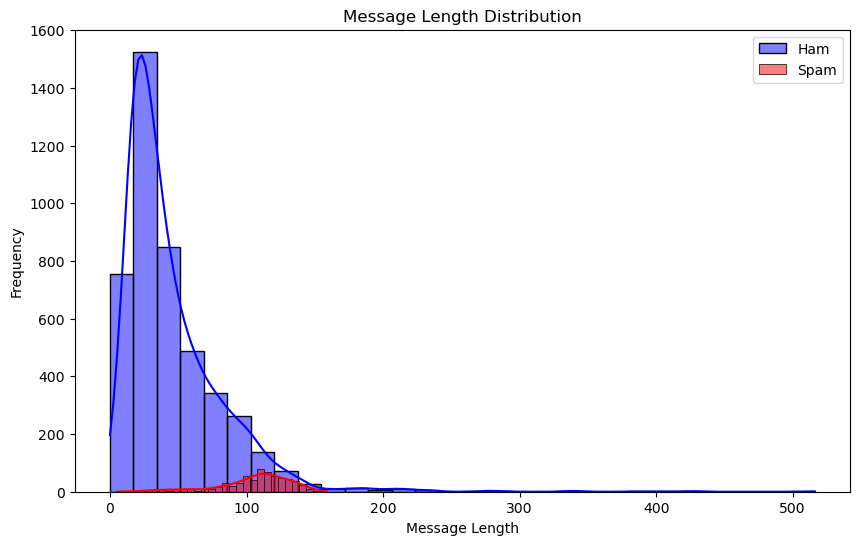

In [22]:
#msglength
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Category'] == 0]['Message_Length'], bins=30, kde=True, color='blue', label='Ham')
sns.histplot(df[df['Category'] == 1]['Message_Length'], bins=30, kde=True, color='red', label='Spam')
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


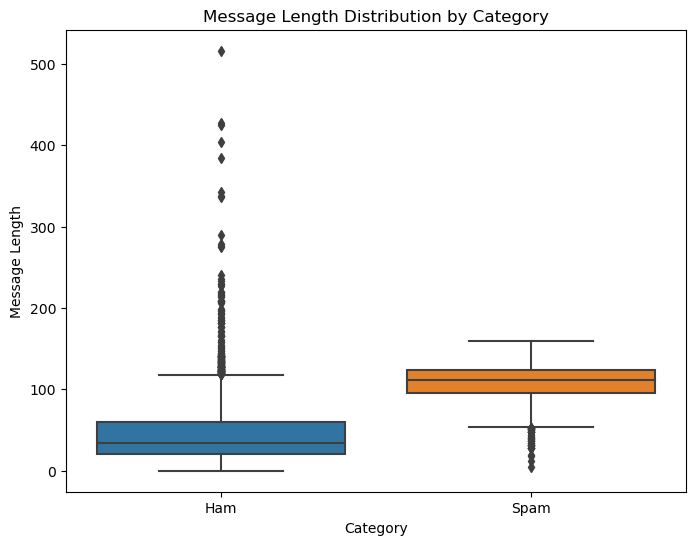

In [23]:
#msglength vs category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Category', y='Message_Length')
plt.title('Message Length Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Message Length')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

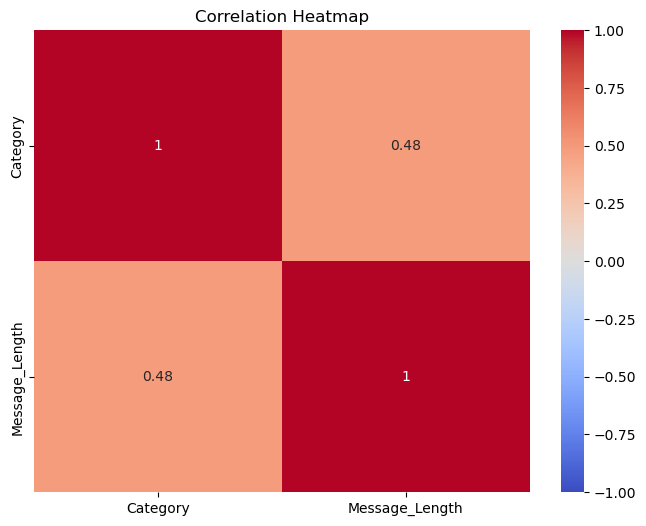

In [24]:
#correlation

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Category', 'Message_Length']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


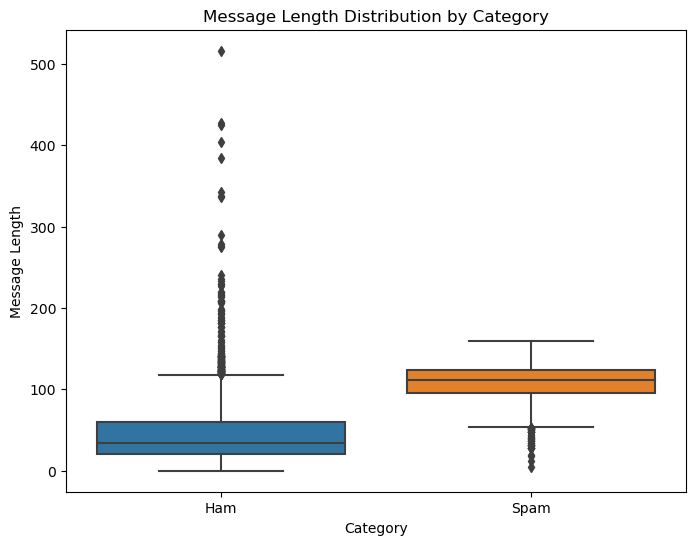

In [25]:
#boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Category', y='Message_Length')
plt.title('Message Length Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Message Length')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


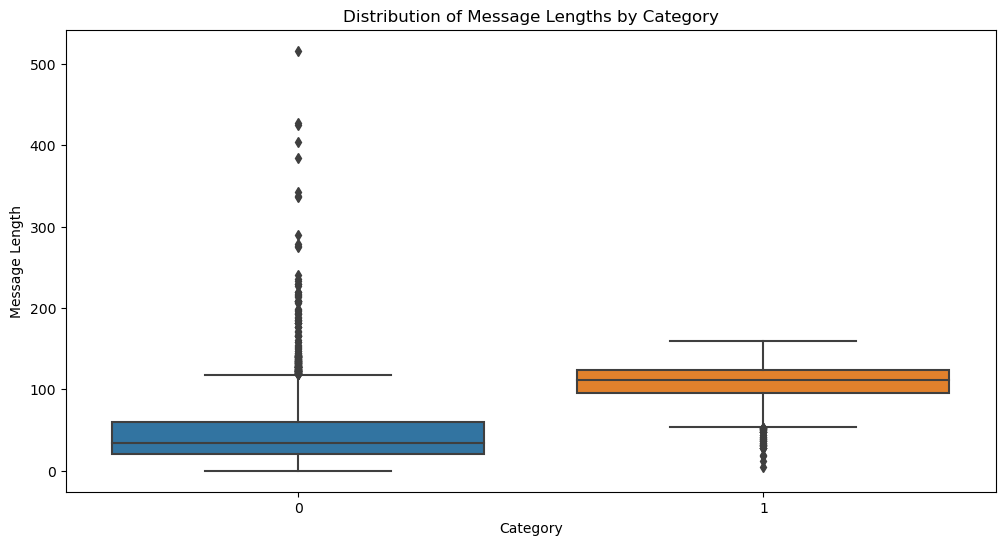

In [31]:
# Plot the distribution of message lengths by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Message_Length', data=df)
plt.title('Distribution of Message Lengths by Category')
plt.xlabel('Category')
plt.ylabel('Message Length')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df['Message']
y = df['Category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vec = vectorizer.transform(X_test)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    print(classification_report(y_test, y_pred))


MultinomialNB: Accuracy = 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.71      0.83       136

    accuracy                           0.96      1032
   macro avg       0.98      0.86      0.91      1032
weighted avg       0.96      0.96      0.96      1032

LogisticRegression: Accuracy = 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       896
           1       0.95      0.71      0.81       136

    accuracy                           0.96      1032
   macro avg       0.95      0.85      0.89      1032
weighted avg       0.96      0.96      0.95      1032

RandomForestClassifier: Accuracy = 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.85      0.91       136

    accuracy                           0.98      1032
   macro avg       0.

In [35]:
df = df[['Category', 'Message']]

# Convert the 'Category' to numerical values
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [36]:
#tokenization

import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK data files
nltk.download('punkt')

# Tokenize the messages
df['Tokens'] = df['Message'].apply(word_tokenize)

# Display the first few tokenized messages
print(df[['Message', 'Tokens']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                              Tokens  
0  [go, jurong, point, crazy, available, bugis, n...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...  
3      [u, dun, say, early, hor, u, c, already, say]  
4  [nah, dont, think, goes, usf, lives, around, t...  


In [37]:
#stopword removal
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokenized messages
df['Tokens'] = df['Tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Display the first few messages after stopword removal
print(df[['Message', 'Tokens']].head())

                                             Message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                              Tokens  
0  [go, jurong, point, crazy, available, bugis, n...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...  
3      [u, dun, say, early, hor, u, c, already, say]  
4  [nah, dont, think, goes, usf, lives, around, t...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
#stemming

from nltk.stem import PorterStemmer

# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Apply stemming to the tokenized messages
df['Stemmed_Tokens'] = df['Tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Display the first few messages after stemming
print(df[['Message', 'Tokens', 'Stemmed_Tokens']].head())

                                             Message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                              Tokens  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around, t...   

                                      Stemmed_Tokens  
0  [go, jurong, point, crazi, avail, bugi, n, gre...  
1                       [ok, lar, joke, wif, u, oni]  
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...  
3      [u, dun, say, earli, hor, u, c, alreadi, say]  
4  [nah, dont, think, goe, usf, live, around, tho..

In [39]:
#lemmatization
from nltk.stem import WordNetLemmatizer

# Download WordNet data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the tokenized messages
df['Lemmatized_Tokens'] = df['Tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Display the first few messages after lemmatization
print(df[['Message', 'Tokens', 'Lemmatized_Tokens']].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...


                                             Message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                              Tokens  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around, t...   

                                   Lemmatized_Tokens  
0  [go, jurong, point, crazy, available, bugis, n...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...  
3      [u, dun, say, early, hor, u, c, already, say]  
4  [nah, dont, think, go, usf, life, around, though

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


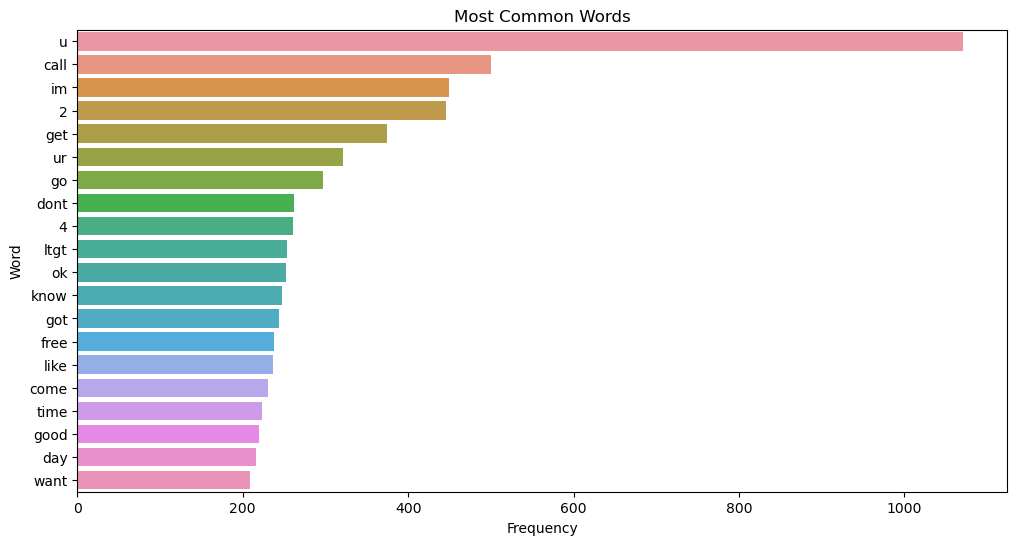

In [40]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the list of tokens and count the frequency of each word
all_words = [word for tokens in df['Lemmatized_Tokens'] for word in tokens]
word_freq = Counter(all_words)

# Get the most common words
common_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df)
plt.title('Most Common Words')
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             Message  Sentiment_Score
0  go jurong point crazy available bugis n great ...           0.4019
1                            ok lar joking wif u oni           0.4767
2  free entry 2 wkly comp win fa cup final tkts 2...           0.7964
3                u dun say early hor u c already say           0.0000
4        nah dont think goes usf lives around though          -0.1027


C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


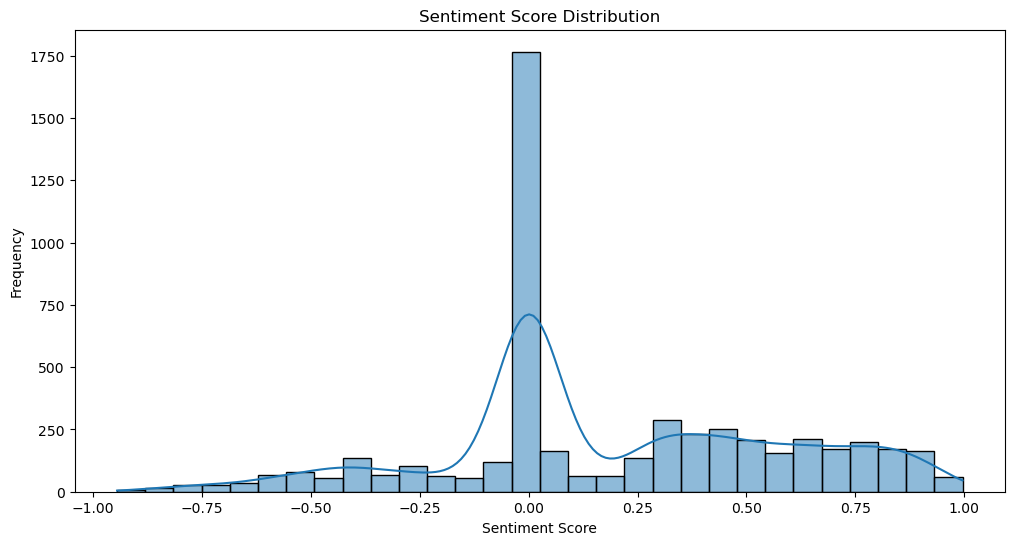

In [42]:
#sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['Sentiment_Score'] = df['Message'].apply(lambda message: sid.polarity_scores(message)['compound'])

# Display the first few messages with sentiment scores
print(df[['Message', 'Sentiment_Score']].head())

# Plot sentiment scores distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Sentiment_Score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [43]:
#pos tagging
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# Apply POS tagging
df['POS_Tags'] = df['Tokens'].apply(pos_tag)

# Display the first few messages with POS tags
print(df[['Message', 'POS_Tags']].head())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


                                             Message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                            POS_Tags  
0  [(go, VB), (jurong, JJ), (point, NN), (crazy, ...  
1  [(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...  
2  [(free, JJ), (entry, NN), (2, CD), (wkly, JJ),...  
3  [(u, JJ), (dun, NNS), (say, VBP), (early, JJ),...  
4  [(nah, JJ), (dont, NN), (think, NN), (goes, VB...  


In [50]:
#named entity recognition

from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Apply NER
df['NER_Tags'] = df['Tokens'].apply(lambda tokens: ne_chunk(pos_tag(tokens)))

# Display the first few messages with NER tags
print(df[['Message', 'NER_Tags']].head())

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Vedha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


                                             Message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                            NER_Tags  
0  [(go, VB), (jurong, JJ), (point, NN), (crazy, ...  
1  [(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...  
2  [(free, JJ), (entry, NN), (2, CD), (wkly, JJ),...  
3  [(u, JJ), (dun, NNS), (say, VBP), (early, JJ),...  
4  [(nah, JJ), (dont, NN), (think, NN), (goes, VB...  


In [51]:
#tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform the messages
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Message'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

   amp  ask  babe  buy  care  cash  claim  come  contact  cos  ...       wat  \
0  0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0      0.0  0.0  ...  0.617564   
1  0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0      0.0  0.0  ...  0.000000   
2  0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0      0.0  0.0  ...  0.000000   
3  0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0      0.0  0.0  ...  0.000000   
4  0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0      0.0  0.0  ...  0.000000   

   way  week       win  wont  work   ya  yeah  yes  youre  
0  0.0   0.0  0.000000   0.0   0.0  0.0   0.0  0.0    0.0  
1  0.0   0.0  0.000000   0.0   0.0  0.0   0.0  0.0    0.0  
2  0.0   0.0  0.583955   0.0   0.0  0.0   0.0  0.0    0.0  
3  0.0   0.0  0.000000   0.0   0.0  0.0   0.0  0.0    0.0  
4  0.0   0.0  0.000000   0.0   0.0  0.0   0.0  0.0    0.0  

[5 rows x 100 columns]


In [52]:
#lda
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the LDA model
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Display the top words in each topic
for i, topic in enumerate(lda_model.components_):
    print(f"\nTopic {i + 1}:")
    print([tfidf_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Topic 1:
['happy', 'reply', 'today', 'dear', 'day', 'hey', 'new', 'stop', 'tell', 'love']

Topic 2:
['ask', 'week', 'way', 'hi', 'ur', 'home', 'come', 'got', 'ok', 'im']

Topic 3:
['work', 'great', 'time', 'oh', 'think', 'da', 'need', 'good', 'know', 'like']

Topic 4:
['tomorrow', 'number', 'claim', 'wat', 'going', 'send', 'night', 'lor', 'want', 'ltgt']

Topic 5:
['make', 'lol', 'yes', 'txt', 'ill', 'thats', 'yeah', 'sorry', 'text', 'free']
